In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datas/los_data.csv')

## 新一轮空值填充

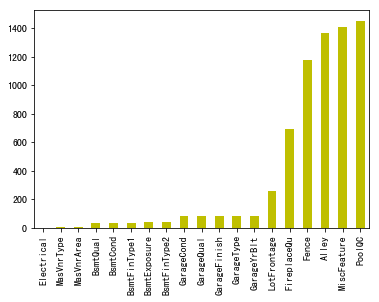

In [10]:
x=train.isnull().sum()
x[x>0].sort_values().plot.bar(color='y')

### LotFrontage 的填充
思路1：取不同的Neighborhood的均值和中位数

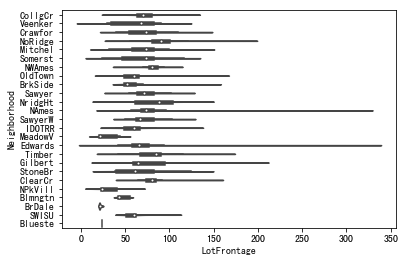

In [9]:
sns.violinplot(train['LotFrontage'], train['Neighborhood'])

In [ ]:
neighborhood_group=train.groupby('Neighborhood')

lot_medinas=neighborhood_group['LotFrontage']

train[train['LotFrontage'].isnull()]['Neighborhood']

#### 思路2：通过LotArea进行填充

In [8]:
train['LotFrontage'].corr(train['LotArea'])

0.42609501877180794

In [7]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.60200221679393606

In [3]:
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


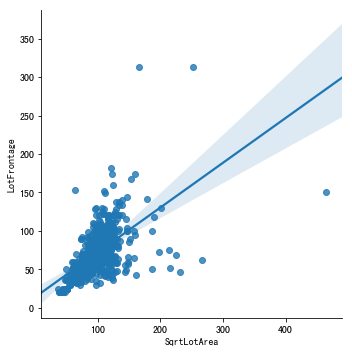

In [4]:
sns.lmplot('SqrtLotArea','LotFrontage', data=train)

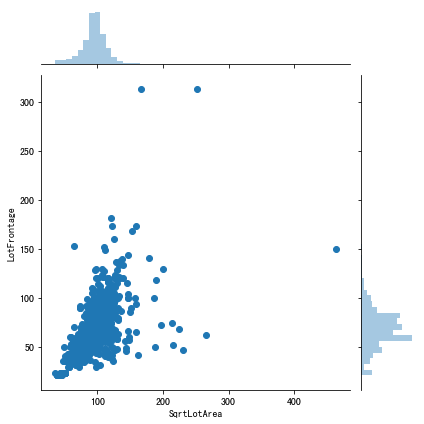

In [6]:
sns.jointplot('SqrtLotArea', 'LotFrontage', data=train)